<h1> This code below shows how to calulate mean & variance, and also how to plot some distributions </h1>

First, import the required library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<h2> I. Calculate The Mean And Variance of A Data. </h2>

It's actually straight forward if you already know the formula

**To calculate mean**:

\begin{equation*}
\mu = \frac{\sum_{i = 1}^{n} x_{i}}{n}
\end{equation*}

**To calculate variance**:

\begin{equation*}
\sigma ^{2} = \frac{\sum_{i = 1}^{n} ( x_{i} - \mu )^{2}}{n}
\end{equation*}

n is the number of item in the data and x is the value of an item

In [ ]:
def CalculateMeanVariance(data):
    total = 0
    for x in data:
        total += x
    
    mean = total/len(data)
    
    totalVariance = 0
    for x in data:
        totalVariance += (x - mean)**2
        
    variance = totalVariance/len(data)
    
    return mean, variance

Now to test our function, let's try on some data.
Here we will use numpy library to generate data with specified mean and standard deviation.

In this case, we generate a data which has 10000 values, having the mean value of 50 and standard deviation of 3

In [ ]:
# generate data with 10000 values, having the mean value of 50 and standard deviation of 3
data = np.random.normal(50,3,10000)
print(data)

[50.5581363  46.79389724 49.18073942 ... 51.10390105 49.42915865
 51.90529557]


Now, calculate the mean and variance of our data using the previously defined function.
Remember that variance is the square of standard deviation.
So, the mean of our data must approach 50 and the variance must approach 9

In [ ]:
mean, variance = CalculateMeanVariance(data)
print("Mean : {}, Variance : {}".format(mean,variance))

Mean : 49.99291500162579, Variance : 9.001058539722893


So, our function works perfectly

<h2> II. Plotting Continuous Distribution </h2>
<h3> A. Normal Distribution </h3>
<h4> 1. Plotting Normal Distribution Model Based on Mean and Variance </h4>

        The Probability Distribution function of Normal Distribution is :
\begin{equation*}
        X \sim N(\mu ,\sigma ^2) \: \: \: \: \:
        f(x) = \frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{1}{2}\left ( \frac{x-\mu }{\sigma } \right )^2}
\end{equation*}

In [ ]:
def PlotNormalDistribution( mean = 0, squareVariance = 1):
    '''
    This function plots a gaussian distribution given a mean and square variance
    '''
    # our x is ranged from mean - 4 std to mean + 4 std because in this range, we can perfectly see the bell shaped curve
    x = np.linspace( mean - 4*(squareVariance**0.5) , mean + 4*(squareVariance**0.5) )
    y = (1/(2*np.pi*squareVariance)**(1/2)) * (np.e) ** (-1*((x - mean)**2)/(2*squareVariance))
    plt.plot(x,y)

        Try to plot N(10, 2.5)

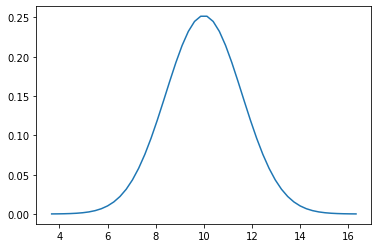

In [ ]:
PlotNormalDistribution(10,2.5)

<h4> 2. Plotting Normal Distribution Model Based on Given Data </h4>

        We can use seaborn to automatically plot the histogram and its distribution using seaborn's distplot function

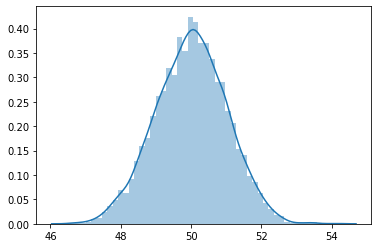

In [ ]:
import seaborn as sns

data = np.random.normal(50, 1, 10000)
sns.distplot(data)

<h3> B. Gamma Distribution </h3>
<h4> 1. Plotting Normal Distribution Model Based on Shape and Scale </h4>

        The Probability Distribution function of Normal Distribution is :
\begin{equation*}
        X \sim Gamma(k,\theta), \: \: \: \: \:
        f(x)= \frac{x^{k-1}e^{-\frac{x}{\theta}}}{\theta^k\Gamma(k) }\; \; \; , x>0, k>0 , \theta >0
\end{equation*}

where k is the shape of distribution and theta is the scale. For the practical use of gamma distribution, you can read it here http://wiki.stat.ucla.edu/socr/index.php/AP_Statistics_Curriculum_2007_Gamma



We can use scipy built in function to calculate the pdf above

In [ ]:
from scipy import stats as sp

def PlotGammaDistribution( k, theta ):
    x = np.linspace(sp.gamma.ppf(0.01, k, scale = theta),sp.gamma.ppf(0.99, k, scale = theta), 100)
    y = sp.gamma.pdf(x, k, scale = theta)
    plt.xticks(np.arange(min(x), max(x)+1))
    plt.plot(x, y, 'r-')

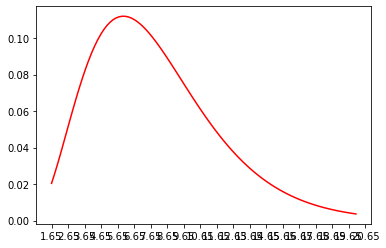

In [ ]:
#example of gamma distribution with k = 4 and theta = 2
PlotGammaDistribution(4,2)

<h2> III. Plotting Discrete Distribution </h2>
<h3> A. Uniform Discrete Distribution </h3>

    This is the simplest discrete distribution, where all events are equally likely. The example is rolling a single die. All 6 sides has a 1/6 probability.
\begin{equation*}  
    X\sim U(a,b),  \: \: \: \: \: P(x = c) = \frac{1}{b-a+1}
\end{equation*}

In [ ]:
def PlotUniformDistribution( a, b):
    size = b-a + 1
    x = np.array(range(a,b+1))
    y = []
    for i in range(a, b+1):
        y.append(1/size)
    
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.plot(x,y,'ro')

    Now, let's see the probability distribution of rolling a die

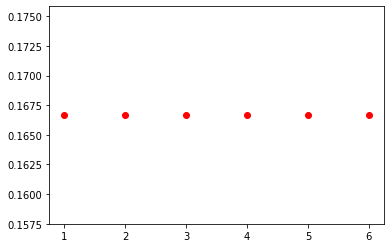

In [ ]:
PlotUniformDistribution(1,6)

<h3> B. Binomial Distribution </h3>

    This distribution shows the probability of the number of True/Yes/1 outcome given n independents experiment. The great example is coin flipping. This distribution could help us to answer the question: "if i flip a coin 10 times, what is the probability of a head showing only 2 times?"


\begin{equation*}  
    X\sim B(n,p),  \: \: \: \: \: P(x=k) = \binom{n}{k}p^kq^{n-k}
\end{equation*}

where n is the number of independent experiments (e.g. flipping coin), p is the probability of True/Yes/1 outcome (e.g. probability of head is 0.5), and q is the probability of False/No/0 outcome (1-p).

k is showing the number of true/yes/1 outcome given n outcome



In [ ]:
def fact(n): 
    res = 1 
    for i in range(2, n+1): 
        res = res * i 
    return res 

def nCr(n, r): 
    return (fact(n) / (fact(r)  
                * fact(n - r))) 
  
def PlotBinomialDistribution(n,p):
    x = np.array(range(0,n+1))
    y = []
    for k in x:
        y.append(nCr(n,k)*(p**k)*(1-p)**(n-k))
        
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.plot(x,y,'ro')

Now, let's answer the question "if i flip a coin 10 times, what is the probability of a head showing only 2 times?" In this case, n = 10 and p = 0.5

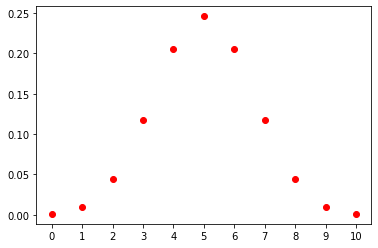

In [ ]:
PlotBinomialDistribution(10,0.5)

From the graph below p(x=2) is approximately 0.05, which is around 5%

<h3> C. Poisson Distribution </h3>

    This distribution expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. This distribution help us answer this kind of question "If every 10 minutes there are 3 cars pass in front of me, what is the probability of 5 cars pass in front of me within 10 minutes?".


\begin{equation*}  
    X\sim Pois(\lambda),  \: \: \: \: \: P(x = k) = \frac{\lambda^ke^{-\lambda}}{k!}
\end{equation*}

where lambda is the expected number of occurences within a fixed interval of time, and k is the number of occurences (that we want to know) within a fixed interval of time.


In [ ]:
def fact(n): 
    res = 1 
    for i in range(2, n+1): 
        res = res * i 
    return res 
  
def PlotPoissonDistribution(Lambda):
    x = np.array(range(0,Lambda+10))
    y = []
    for k in x:
        y.append( ( Lambda**k*np.exp(1)**(-Lambda) )/ fact(k))
        
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.plot(x,y,'ro')

So, to answer the previous question: "If every 10 minutes there are 3 cars pass in front of me, what is the probability of 5 cars pass in front of me within 10 minutes?". we could plot poiss(3) and look at the value p(x = 5)

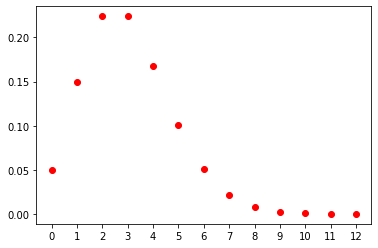

In [ ]:
PlotPoissonDistribution(3)

So, the probability P(x = 5) is around 0.1 or approximately 10%